In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import DBSCAN, KMeans

from plotnine import *

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Data Prep

In [2]:
num_points = 4000
x = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
y = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
z = [(x**2 + y**2) for x, y in zip(x, y)]

df = pd.DataFrame(list(zip(x, y, z)), columns=['x', 'y', 'z'])
df['class'] = [1 if ((i<10) | (80 < i< 100))  else 0 for i in df['z']]

In [3]:
df = df[df['class']==1]
df.drop(['z', 'class'], axis=1, inplace=True)

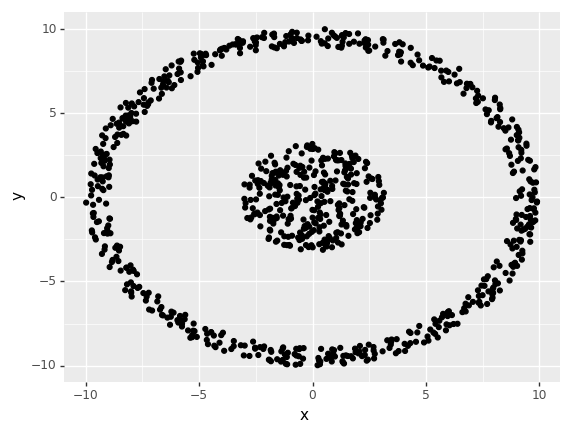

<ggplot: (-9223371871873389480)>

In [5]:
(ggplot(df) 
 + aes(x='x', y='y')
 + geom_point()
)

# Modeling

In [8]:
clustering = DBSCAN(eps=3, min_samples=2).fit(df)

In [9]:
df['labels'] = clustering.labels_

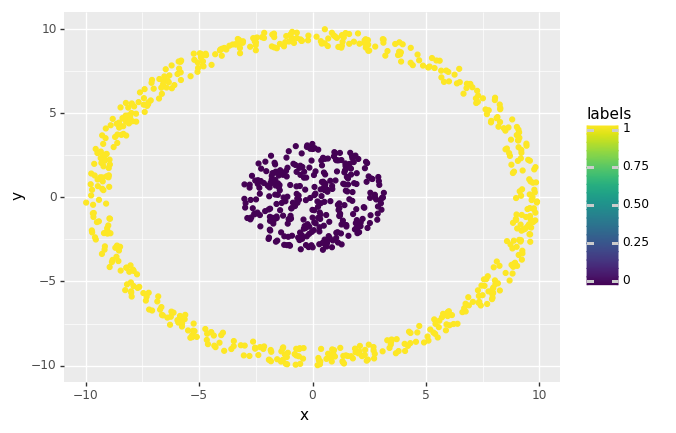

<ggplot: (164982208860)>

In [10]:
(ggplot(data=df) +
  aes(x='x', y='y', color='labels') +
  geom_point()
)

## Kmeans Result